**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [261]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics

# import data 2C_weka.csv for 2 Class Classifcation.


In [262]:
twoc_df = pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [263]:
twoc_df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [264]:
twoc_df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [265]:
twoc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [266]:
twoc_df["class"].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [267]:
twoc_df.groupby(["class"]).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


In [268]:
twoc_df["class"] = twoc_df["class"].astype('category')
twoc_df.dtypes

pelvic_incidence             float64
pelvic_tilt numeric          float64
lumbar_lordosis_angle        float64
sacral_slope                 float64
pelvic_radius                float64
degree_spondylolisthesis     float64
class                       category
dtype: object

In [269]:
import seaborn as sns

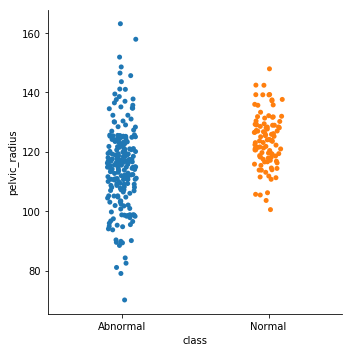

In [270]:
sns.catplot(x="class", y="pelvic_radius", order=["Abnormal", "Normal"], data=twoc_df)

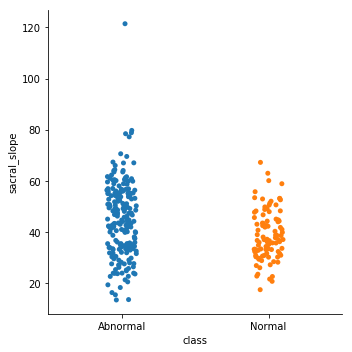

In [271]:
sns.catplot(x="class", y="sacral_slope", order=["Abnormal", "Normal"], data=twoc_df)

In [272]:
twoc_df.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [273]:
twoc_df.var()

pelvic_incidence             297.097633
pelvic_tilt numeric          100.166675
lumbar_lordosis_angle        344.253290
sacral_slope                 180.179672
pelvic_radius                177.352531
degree_spondylolisthesis    1410.680476
dtype: float64

# Encode the Class variable to integer.

In [274]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
twoc_df['class']=LE.fit_transform(twoc_df['class'])

In [275]:
twoc_df['class'].unique()

array([0, 1], dtype=int64)

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [276]:
x=twoc_df.drop(labels="class",axis=1)

In [277]:
y=twoc_df[["class"]]

# Normalize your Data (X) to get values between 0 to 1.

In [278]:
x=x.apply(zscore)

# Split the dat as train and test with a ratio of 70:30.

In [279]:
test_size = 0.3

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [280]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

In [281]:
NNH = KNeighborsClassifier(n_neighbors= 3)
NNH.fit(x_train, y_train)
predicted_labels = NNH.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [282]:
print("Accuracy for k=3 is ",NNH.score(x_test, y_test))

Accuracy for k=3 is  0.8172043010752689


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [283]:
for x in range(1, 20, 2):
    NNH = KNeighborsClassifier(n_neighbors= x)
    NNH.fit(x_train, y_train)
    predicted_labels = NNH.predict(x_test)
    if x==1:
        acc=({x:NNH.score(x_test, y_test)})
    else:
        acc.update({x:NNH.score(x_test, y_test)})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversion

In [284]:
acc

{1: 0.8172043010752689,
 3: 0.8172043010752689,
 5: 0.8279569892473119,
 7: 0.7956989247311828,
 9: 0.8279569892473119,
 11: 0.8172043010752689,
 13: 0.8172043010752689,
 15: 0.8494623655913979,
 17: 0.8387096774193549,
 19: 0.8494623655913979}

In [285]:
print("Optimum value for k = "+str(max(acc,key=acc.get)))

Optimum value for k = 15


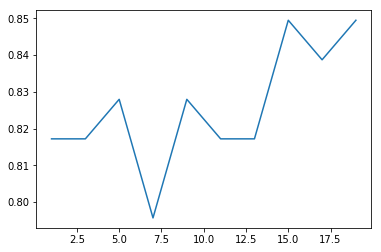

In [286]:
import matplotlib.pyplot as plt
plt.plot(acc.keys(),acc.values())

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [287]:
threec_df = pd.read_csv("3Classdata.csv")

In [288]:
threec_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [289]:
threec_df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [290]:
threec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [291]:
threec_df["class"].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [292]:
threec_df.groupby(["class"]).count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


In [293]:
threec_df["class"] = threec_df["class"].astype('category')
threec_df.dtypes

pelvic_incidence             float64
pelvic_tilt                  float64
lumbar_lordosis_angle        float64
sacral_slope                 float64
pelvic_radius                float64
degree_spondylolisthesis     float64
class                       category
dtype: object

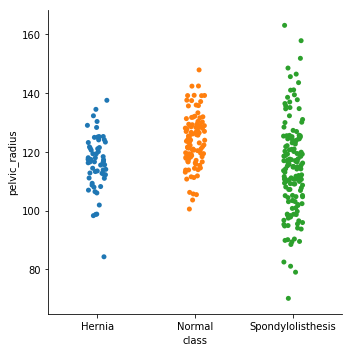

In [294]:
sns.catplot(x="class", y="pelvic_radius", order=["Hernia", "Normal","Spondylolisthesis"], data=threec_df)

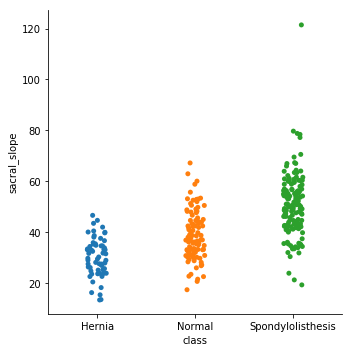

In [295]:
sns.catplot(x="class", y="sacral_slope", order=["Hernia","Normal","Spondylolisthesis"], data=threec_df)

In [296]:
threec_df.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [297]:
threec_df.var()

pelvic_incidence             297.097633
pelvic_tilt                  100.166675
lumbar_lordosis_angle        344.253290
sacral_slope                 180.179672
pelvic_radius                177.352531
degree_spondylolisthesis    1410.680476
dtype: float64

In [298]:
LE=preprocessing.LabelEncoder()
threec_df['class']=LE.fit_transform(threec_df['class'])

In [299]:
threec_df['class'].unique()

array([0, 2, 1], dtype=int64)

In [300]:
x=threec_df.drop(labels="class",axis=1)

In [301]:
y=threec_df[["class"]]

In [302]:
x=x.apply(zscore)

In [303]:
test_size = 0.3

In [304]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

In [305]:
NNH = KNeighborsClassifier(n_neighbors= 3)
NNH.fit(x_train, y_train)
predicted_labels = NNH.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [306]:
print("Accuracy for k=3 is ",NNH.score(x_test, y_test))

Accuracy for k=3 is  0.7526881720430108


In [307]:
for x in range(1, 20, 2):
    NNH = KNeighborsClassifier(n_neighbors= x)
    NNH.fit(x_train, y_train)
    predicted_labels = NNH.predict(x_test)
    if x==1:
        acc=({x:NNH.score(x_test, y_test)})
    else:
        acc.update({x:NNH.score(x_test, y_test)})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversion

In [308]:
acc

{1: 0.7741935483870968,
 3: 0.7526881720430108,
 5: 0.7849462365591398,
 7: 0.7849462365591398,
 9: 0.7956989247311828,
 11: 0.8172043010752689,
 13: 0.8064516129032258,
 15: 0.8172043010752689,
 17: 0.8172043010752689,
 19: 0.8172043010752689}

In [309]:
print("Optimum value for k = "+str(max(acc,key=acc.get)))

Optimum value for k = 11


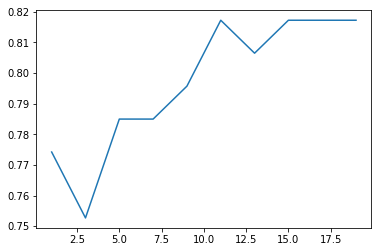

In [310]:
plt.plot(acc.keys(),acc.values())